<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/logistic-regression/logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Linear Regression

A few examples using logistic linear regression are provided below.

## Example 1

Here we have a dataset comprising of diabetes data from the Pima Indian Diabetes Database.

Data courtesy of Pima Indians Diabetes Database: 'National Institute of Diabetes and Digestive and Kidney Diseases'.

Source link:https://www.kaggle.com/uciml/pima-indians-diabetes-database

The objective of this data is to predict the chances of Diabetes from health parameters like glucose, blood pressure, etc. This data is all taken from Pima Indians females of over 21 years old.

### Data Layer

Here, we have a quick view at part of the data.

In [1]:
import pandas as pd
from pandas import DataFrame

In [2]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 274 (delta 53), reused 2 (delta 2), pack-reused 153
Receiving objects: 100% (274/274), 7.72 MiB | 7.37 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [3]:
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/logistic-regression-example-1.csv", sep=",")
print (df.head(10).append(df.tail(10)))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             

Clearly datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

  <br>Then, we can go on to to define the functions we need.

### Code Layer

For the representation of the hypothesis, we define <span style="border-bottom: dashed">sigmoid function</span> :
$$
h_{\theta}=\frac{1}{1+e^{-\theta^Tx}}
$$
Note that $\theta^Tx$ can be non-linear. 
    <br> <span style="border-bottom: dashed">Cost function</span> in logistic refression is defined as: 
$$
J(\theta)=\frac{1}{m}\sum_{i=1}^m-ylog(h_\theta)-(1-y)log(1-h_\theta),
$$
and still, we can use gradient descent to minimize it.
    
<br>In addition, we use <span style="border-bottom: dashed">accuracy function</span> to see how well the algorithm works, which is defined as: 
$$
Accuracy=\frac{1}{m}\sum_{i=1}^{m}\delta_{predicted,real}
$$

In [4]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):  
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):     
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient, args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

Now, we pick the features and outcome out of the initial data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = df

In [6]:
X = data.iloc[:, :-1]        #features
y = data.iloc[:, -1]         #outcome

Then we start prepare the data for fitting the model.

In [7]:
X = np.c_[np.ones((X.shape[0], 1)), X]    #we need x_0
y = y.values.reshape((len(y),1))
theta = np.zeros((X.shape[1], 1))

Implement the Logistic Regression algorithm.

In [8]:
model1 = LogisticRegressionUsingGD()
model1.fit(X, y, theta)
accuracy = model1.accuracy(X, y.flatten())
parameters = model1.w_
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters got by Gradient descent:")
print(parameters)

The accuracy of the model is 78.25520833333334
The model parameters got by Gradient descent:
[-8.33950666e+00  1.22992795e-01  3.49871049e-02 -1.33847683e-02
  6.20495143e-04 -1.17722550e-03  8.89250124e-02  9.37136526e-01
  1.46876967e-02]


As the result turns out, the accuracy is not so high, but acceptable anyway.

Alternatively, we can also use the prebuilt sklearn logistic regression package.

In [9]:
model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters from scikit learn:")
print(parameters)

The accuracy score using scikit-learn is 0.77734375
The model parameters from scikit learn:
[[-3.27462077e+00  1.21044860e-01  3.30700924e-02 -1.29499594e-02
   4.09527062e-03 -1.39166443e-03  7.27291635e-02  1.01590278e+00
   1.27671576e-02]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Note that the results from sklearn package are substancially different to the package written from scratch, this is because sklearn has a feature called 'regularization', which prevents the overfitting to the dataset. For overfitting, we will discuss it in the following example.
<br><br>Since we've got the trained models, we want to use it to predict whether a person has diabetes.
<br>Say if person A's conditions are: Pregnancies:6, Glucose:150, Blood Pressure:72, Skin thickness:36, Insulin：170， BMI:42，DiabetesPedigreeFunction:1, Age:51;
<br>Person B: Pregnancies:0, Glucose:85, Blood Pressure:70, Skin thickness:24, Insulin:200， BMI:25，DiabetesPedigreeFunction:0.2, Age:25.

### Prediction

In [10]:
X1=[[1,6,150,72,36,170,42,1,51],[1,0,85,70,24,200,25,0.2,25]]
print('The prediction of the first method:',model1.predict(X1))
print('The prediction of the second method:',model.predict(X1))

The prediction of the first method: [[0.87281508]
 [0.02308211]]
The prediction of the second method: [1 0]


The result turns out that person A has diabetes while B doesn't. Considering their conditions, the predictions make sense.

## Example 2

### Data Layer

In [11]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import random

This time, we try to predict heart disease. 
<br>Data source: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data
<br><br>We try to predict whether a given person will have a coronary heart disease in the next 10 years given various parameters like sex, age, eduction, blood pressure, BMI, etc. 

Given that there are some NaN (missing data) in the dataframe, they will be filled with data randomly chosen from other values of the same feature.
    
<br>Still, have a quick view of the data.

In [12]:
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/logistic-regression-example-2.csv", sep=",")

#print(df)

df = df.apply(lambda x: x.fillna(random.choice(x.dropna())), axis=1)
print(df.head(10).append(df.tail(10))) #first 10 & last 10

      male   age  education  currentSmoker  cigsPerDay  BPMeds  \
0      1.0  39.0        4.0            0.0         0.0     0.0   
1      0.0  46.0        2.0            0.0         0.0     0.0   
2      1.0  48.0        1.0            1.0        20.0     0.0   
3      0.0  61.0        3.0            1.0        30.0     0.0   
4      0.0  46.0        3.0            1.0        23.0     0.0   
5      0.0  43.0        2.0            0.0         0.0     0.0   
6      0.0  63.0        1.0            0.0         0.0     0.0   
7      0.0  45.0        2.0            1.0        20.0     0.0   
8      1.0  52.0        1.0            0.0         0.0     0.0   
9      1.0  43.0        1.0            1.0        30.0     0.0   
4228   0.0  50.0        1.0            0.0         0.0     0.0   
4229   0.0  51.0        3.0            1.0        20.0     0.0   
4230   0.0  56.0        1.0            1.0         3.0     0.0   
4231   1.0  58.0        3.0            0.0         0.0     0.0   
4232   1.0

### Sigmoid Function

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def  computeCost(theta,X,y):
    
    m = float(len(y))
    
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions)))
    return cost

Now, we define our sigmoid function which is characteristic of logistic regression. Note: the sigmoid function has two equavalent forms (which is trivally easy to show): 
$$
\sigma(x)=\frac{1}{1+e^{-x}}=\frac{e^x}{e^x+1}
$$
In most  cases the former is better because it only calls the exponential function once, however, when x is very large it may be favorable to use the second form due to floating-point limitations.
    
<br>We also define a cost function to minimize.

### Feature scaling

Then, we set our data for computation.

In [14]:
df = df.to_numpy()
X = df[:,0:-1]
y = df[:,-1]
y = y.reshape((len(y),1))
n = X.shape[1]+1
print(X.shape)

(4238, 15)


Next, as with all machine learning tasks where the scalar distance is involved, this data needs to be scaled, meaning that any feature which has a high numerical value does not dominate the fit. Note, the $y$ value does not need to be scaled because it is a vector and hence any scalar operations can be thought of as being performed *in the units of* $y$. In fact, if one does scale $Y$, then information is lost about the units of $Y$. 

In [15]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
print(scaler)
X = X_scaled     #we want to use symbol X

(4238, 15)
RobustScaler()


Like linear regression, we append a column for the intercept.

In [16]:
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((n,1))

### Gradient Descent 

First we define the algorithm for gradient descent.

In [17]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations"
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        
        prediction = sigmoid(X.dot(theta))
        #print(prediction)
        #print(np.dot(X.T,prediction - y))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

Now, we can do gradient descent, get the coefficients in the hypothesis and also observe the change of the cost_function.

In [18]:
alpha =0.01
n_iter =10000

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)
print(theta)

[[-2.30291527e+00]
 [ 3.72477796e-01]
 [ 8.08990270e-01]
 [-2.45850448e-03]
 [ 1.59914176e-02]
 [ 2.60821215e-01]
 [ 1.21663055e-03]
 [ 1.06875877e-01]
 [ 5.73836134e-02]
 [ 1.14583996e-01]
 [ 6.53098225e-02]
 [ 4.06015641e-01]
 [ 2.70995833e-02]
 [-2.21089621e-02]
 [-2.36200413e-02]
 [ 7.19262888e-02]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

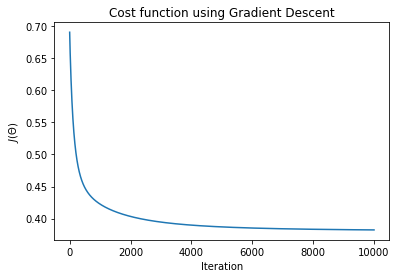

In [19]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
#plt.yscale("log")
plt.title("Cost function using Gradient Descent")

In [20]:
print('Final Cost is :', cost_history[-1])


Final Cost is : 0.3823836922156188


As is common in gradient descent, the cost function decrases rapidly at the beginning then levels off very quickly.

### Regularization

However, a concept known as regularization can be used to improve generality of the fit i.e. make it more suited to classifying unseen data, hence avoiding the problem of overfitting. <br>In statistics, overfitting is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.
    
<br>To do this, we need to introduce a regularization constant $\lambda$, and redefine our cost function.

In [21]:
def  RegcomputeCost(theta,X,y,reg=0):
    
    m = float(len(y))
    
    predictions = sigmoid(X.dot(theta))
    theta2 = np.square(theta)
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions))) + (reg/(2*m))*np.sum(theta2)
    return cost

Here, the additional term  
$$
\frac{\lambda}{2m}\sum^{n}_{j=1}\theta_j^2
$$
in the cost is the regularization term.

Since the cost function has changed, the function within gradient descent needs to change too. Essentially the formula for updating gradient descnet is $\theta_j:=\theta_j-\alpha\nabla J(\theta)$. This formula has been implemented previously without explicitly using the derivative of the cost function since the functions inside the derivative can be explicitly defined. However, the derivative of the regularized cost function is piecewise since, by convention, the intercept ($\theta_0$) is not regularized; this means that the subtraction operation must be performed on theta twice—once for the gradient of the cost function, the second time for the gradient of the regularization term which does not apply to $\theta_0$.

In [22]:
def Reggradient_descent(X,y,theta,alpha=0.01,iterations=100,reg=0):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        prediction = sigmoid(X.dot(theta))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta[1:] = theta[1:]-alpha*reg*(1/m)*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = RegcomputeCost(theta,X,y,reg)
        
    return theta, cost_history, theta_history

Now, running the regularized gradient descent with the same parameters as above.

In [23]:
theta = np.zeros((n,1))
reg = 0.1
theta,cost_history,theta_history = Reggradient_descent(X_b,y,theta,alpha,n_iter,reg)
print(theta)


[[-2.30277990e+00]
 [ 3.72315308e-01]
 [ 8.08584356e-01]
 [-2.45779905e-03]
 [ 1.61463121e-02]
 [ 2.60627950e-01]
 [ 1.21730713e-03]
 [ 1.06763150e-01]
 [ 5.76025977e-02]
 [ 1.14498600e-01]
 [ 6.53214135e-02]
 [ 4.05890178e-01]
 [ 2.71371931e-02]
 [-2.20921058e-02]
 [-2.36246317e-02]
 [ 7.19368049e-02]]


Text(0.5, 1.0, 'Cost function using Gradient Descent with Regularization')

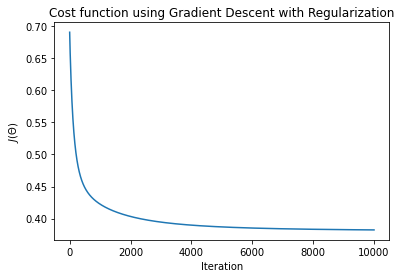

In [24]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
#plt.yscale("log")
plt.title("Cost function using Gradient Descent with Regularization")

In [25]:
print('Final Cost is :', cost_history[-1])

Final Cost is : 0.3824598481642326


From this, the final cost using the same parameters is very much the same as that using the unregularized version.  <br>In some sense, the result reflects that there's no overfitting in this dataset， but we have showed what the method is like, anyway.<br>When faced with problems with very many features, it is best to use this version of the algorithm.

### Prediction

With the hypothesis got, we are now trying to make a prediction.

<br>Take a healthy person with :gender-1(male), age-25, education-4(college), current smoker-0, cigs_perday-0, bpmeds-0(not on blood pressure medication, prevalentstroke-0, prevalentHyp-0, diabetes-0, totChol-225, sysBP-100,diaBP-70,BMI-24, heartrate-72, glucose-64)

<br>Note, since we are using $\theta$s got from scaled data, we need to scale the feature before predicting.

In [26]:
#so, X would be:
X=np.asarray([1,25,4,0,0,0,0,0,0,225,100,70,24,72,64]).reshape(15,1)
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)# scaling
X = X_scaled.reshape(1,15)
X=np.c_[np.mat([[1]]),X]
print('the variable of sigmoid function(linear function):',np.dot(X,theta),'sigmoid function:',1/(1+np.exp(-np.dot(X,theta))))


the variable of sigmoid function(linear function): [[-1.24164054]] sigmoid function: [[0.22415056]]


We predict $y=0$ (he will not have a heart disease in the next 10 years) when the linear part $\leq0$ and sigmoid function $\leq0.5$, which accords with the data given.

## Example 3

In logistic regression, decision boundary is important and can clearly show the classification. Therefore, we plan to make the figure of decision boundary in the following, which is the main task in the example.

### Data Layer

The idea is to use the scores of 2 exams to predict whether a person is admitted.
<br>Data source:https://www.kaggle.com/chadansharma/logistic-regression-practice
<br><br>Have a look at the data:

In [32]:
import pandas as pd
from pandas import DataFrame


In [33]:
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/logistic-regression-example-3.csv", sep=",")

print (df.head(10).append(df.tail(10)))

     1st_exam   2nd_exam  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
5   45.083277  56.316372         0
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
90  94.094331  77.159105         1
91  90.448551  87.508792         1
92  55.482161  35.570703         0
93  74.492692  84.845137         1
94  89.845807  45.358284         1
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1


### Logistic Regression

Then we define the functions we need as before.

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def  computeCost(theta,X,y):
    
    m = float(len(y))
    
    predictions = sigmoid(X.dot(theta))
    cost = -(1/m) * (y.T.dot(np.log(predictions))+(1-y).T.dot(np.log(1-predictions)))
    return cost

In [35]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations"
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X.shape[1]))
    for it in range(iterations):
        
        prediction = sigmoid(X.dot(theta))
        #print(prediction)
        #print(np.dot(X.T,prediction - y))
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

### Feature Scaling

Now, we prepare the data for computation, including feature scaling and adding a column to X to fit $\theta$.

In [36]:
df = df.to_numpy()
X = df[:,0:-1]
y = df[:,-1]
y = y.reshape((len(y),1))
n = X.shape[1]+1
print(X.shape)

(100, 2)


In [37]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
print(scaler)
X = X_scaled     #we want to use symbol X

(100, 2)
RobustScaler()


In [38]:
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.zeros((n,1))

### Implementation

With the data ready, we can now implement the functions to get the coefficients(parameters) in the hypothesis.

In [43]:
alpha =0.1
n_iter =10000

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,alpha,n_iter)
print(theta)

[[2.28116514]
 [5.99598994]
 [6.23285393]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

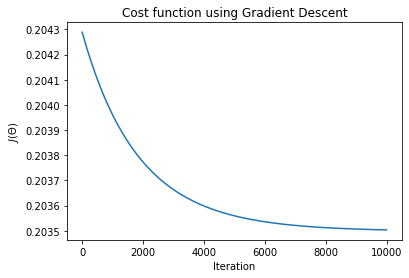

In [44]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
#plt.yscale("log")
plt.title("Cost function using Gradient Descent")

### Decision Boundary

Now we should have a better decision of what the hypothesis function is computing by drawing the decision boundary:
With  $h_\theta=g(\theta_0+\theta_1X_1+\theta_2X_2)$ and $g(z)=\frac{1}{1+e^{-z}}$, we predict $y=1$ if the sigmoild function $\geq0.5$, so the boundary would be $\theta_0+\theta_1X_1+\theta_2X_2=0$

<br>Here, $\theta_0=2.28,\theta_1=5.996,\theta_2=6.23$, so the decision boundary is:    $   5.996X_1+6.23X_2=-2.28$
<br>Show it in the figure below.


To scatter the two results respectively, set two datasets of differents results.

In [45]:
#y=1 admitted(yes)
yes_x=[]
yes_y=[]
#y=0 not admitted(no)
no_x=[]
no_y=[]
for i in range(0,100):
    if y[i]==0:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

Since the features are scaled, we use those scaled data to plot.  Feature scaling doesn't change the inner relation of the variable, so the feature of the figure will not change anyway.

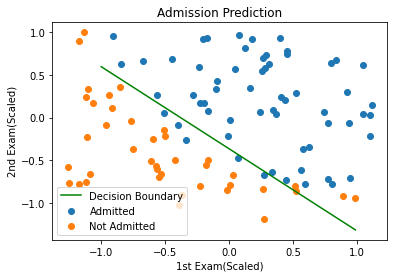

In [46]:
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Admission Prediction')
x=np.arange(-1,1,0.01)
y=(-5.996/6.23)*x+(-2.28/6.23)
plt.plot(x,y,label='Decision Boundary',color='green' )
plt.scatter(yes_x,yes_y,label='Admitted')
plt.scatter(no_x,no_y,label='Not Admitted')
plt.legend()

Nice, the decision boundary works well and makes the classification so clear.